In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import scipy.optimize as opt
np.random.seed(seed=233423)

In [2]:
def RhoSq(y_hat, y_true):
    y_mean = np.mean(y_true)
    return(1 - sum((y_hat-y_true)**2)/sum((y_mean-y_true)**2)  )

In [3]:
Data = pd.read_csv("Seshat Data.csv")

In [4]:
Data

,NGA,PolID,Time,PolPop,PolTerr,CapPop,levels,government,infrastr,writing,texts,money,SPC1,MG_corr
0,Big Island Hawaii,Hawaii1,1000,3.854914,4.111759,2.282858,-0.653777,0.090909,0.100000,0.100000,0.100000,1.8,0.203229,0
1,Big Island Hawaii,Hawaii1,1100,3.854914,4.111759,2.282858,-0.653777,0.090909,0.100000,0.100000,0.100000,1.8,0.203229,0
2,Big Island Hawaii,Hawaii2,1200,3.750606,3.337475,3.363416,1.060611,0.090909,0.090909,0.150000,0.000000,1.8,0.222845,0
3,Big Island Hawaii,Hawaii2,1300,4.065673,3.337475,3.429545,0.943410,0.090909,0.090909,0.150000,0.000000,1.8,0.228982,0
4,Big Island Hawaii,Hawaii2,1400,4.192464,3.337475,3.584463,1.993130,0.090909,0.181818,0.150000,0.000000,1.8,0.258405,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,Yemeni Coastal Plain,YeRasul,1400,5.881658,6.536808,4.698970,4.500000,0.977778,0.950000,1.000000,1.000000,4.5,0.801720,1
860,Yemeni Coastal Plain,YeTahir,1500,5.454290,5.762184,5.171692,4.500000,0.888889,0.966667,1.000000,1.000000,5.0,0.797062,1
861,Yemeni Coastal Plain,TrOttm3,1600,7.447158,6.684486,5.819190,8.036426,0.990909,0.916667,1.000000,1.000000,5.0,0.958307,1
862,Yemeni Coastal Plain,YeQasmi,1700,5.418268,5.553020,3.661252,3.000000,0.572727,0.272727,0.833333,0.814286,5.0,0.568928,1


## SPC1 Break Point for RelTime


In [5]:
np.median(Data["SPC1"])

0.356081775

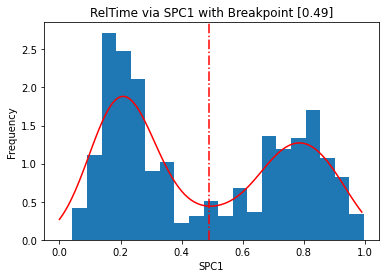

In [6]:
plt.hist(Data["SPC1"], bins = 20, density = True)

x = np.arange(0,1,0.01)
KDE = gaussian_kde(Data["SPC1"])(x)
KDE_min = np.min(KDE[20:80])  # find the minimum in the centre
xmin = x[KDE == KDE_min] # x-position of the minimum
plt.plot(x, KDE, c="red")
plt.axvline(xmin, linestyle="-.",c="red", )
plt.title("RelTime via SPC1 with Breakpoint "+str(np.round(xmin,2)))
plt.xlabel("SPC1")
plt.ylabel("Frequency")
plt.show()

SPC_Break = xmin

### IDEA

If this is too restrictive, maybe choose the first maximum around 0.2 as the "Time Zero". Aka the first emergence of medium-to-large structure.

PolPop


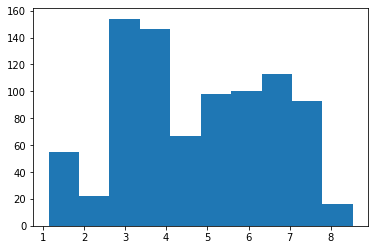

PolTerr


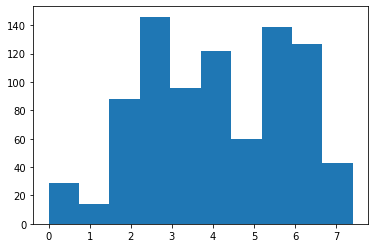

CapPop


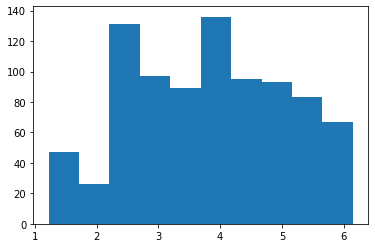

levels


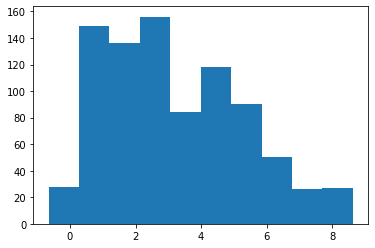

government


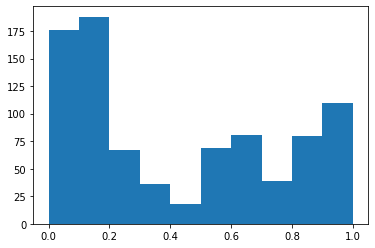

infrastr


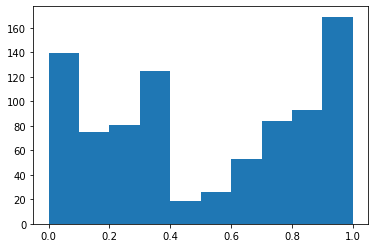

writing


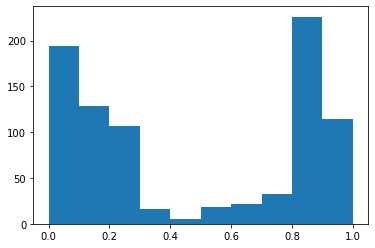

texts


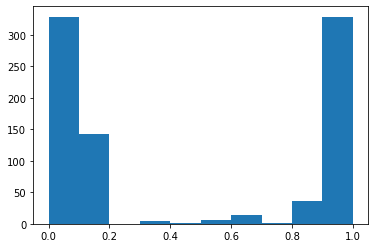

money


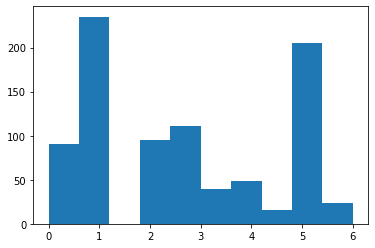

SPC1


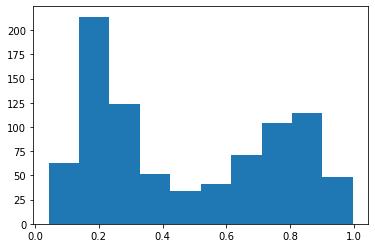

In [7]:
for i in range(3,13):
    print(Data.columns[i])
    plt.hist(Data[Data.columns[i]])
    #plt.set_title(Data.columns[i])
    plt.show()

In [8]:
# Next, we define a relative time scale (RelTime) with 0 at the time when the SPC1 trajectory crosses the 5.3 threshold

In [9]:
NGA = Data["NGA"][0]
print(Data[Data["NGA"] == NGA])

                 NGA    PolID  Time    PolPop   PolTerr    CapPop    levels  \
0  Big Island Hawaii  Hawaii1  1000  3.854914  4.111759  2.282858 -0.653777   
1  Big Island Hawaii  Hawaii1  1100  3.854914  4.111759  2.282858 -0.653777   
2  Big Island Hawaii  Hawaii2  1200  3.750606  3.337475  3.363416  1.060611   
3  Big Island Hawaii  Hawaii2  1300  4.065673  3.337475  3.429545  0.943410   
4  Big Island Hawaii  Hawaii2  1400  4.192464  3.337475  3.584463  1.993130   
5  Big Island Hawaii  Hawaii2  1500  4.599847  3.337475  3.807048  4.564236   
6  Big Island Hawaii  Hawaii2  1600  4.440997  3.337475  2.308375  2.584892   
7  Big Island Hawaii  Hawaii3  1700  5.011752  3.973290  3.442766  3.153204   
8  Big Island Hawaii  USKameh  1800  5.192031  4.226199  4.363033  3.534543   

   government  infrastr   writing  texts  money      SPC1  MG_corr  
0    0.090909  0.100000  0.100000    0.1    1.8  0.203229        0  
1    0.090909  0.100000  0.100000    0.1    1.8  0.203229        0  
2 

In [10]:
NGAlist = list(set(Data["NGA"]))
print(len(NGAlist))
LargeNGAs = []
SmallNGAs = []

for NGA in NGAlist:
    Subset = Data[Data["NGA"] == NGA]
    Logical = np.max(Subset["SPC1"]) > SPC_Break # Is this polity large enough to cross the SPC1 threshold?
    print("Is " +NGA+" large enough?",  Logical)
    if Logical:
        LargeNGAs.append(NGA)
    else:
        SmallNGAs.append(NGA)
    #print(Subset)
print(LargeNGAs)

30
Is Cambodian Basin large enough? [ True]
Is Garo Hills large enough? [False]
Is Cuzco large enough? [ True]
Is Konya Plain large enough? [ True]
Is Niger Inland Delta large enough? [ True]
Is Upper Egypt large enough? [ True]
Is Finger Lakes large enough? [False]
Is Cahokia large enough? [False]
Is Paris Basin large enough? [ True]
Is Kansai large enough? [ True]
Is Iceland large enough? [ True]
Is Orkhon Valley large enough? [ True]
Is Central Java large enough? [ True]
Is Lowland Andes large enough? [False]
Is Lena River Valley large enough? [False]
Is Susiana large enough? [ True]
Is Kapuasi Basin large enough? [False]
Is Deccan large enough? [ True]
Is Big Island Hawaii large enough? [False]
Is Valley of Oaxaca large enough? [False]
Is North Colombia large enough? [False]
Is Kachi Plain large enough? [ True]
Is Middle Yellow River Valley large enough? [ True]
Is Sogdiana large enough? [ True]
Is Yemeni Coastal Plain large enough? [ True]
Is Chuuk Islands large enough? [False]
Is

In [11]:
Seshat_Large = Data[Data["NGA"].isin(LargeNGAs)]
print(Seshat_Large)


                      NGA    PolID  Time    PolPop   PolTerr    CapPop  \
33        Cambodian Basin  KhFunaE   300  6.235249  5.409991  3.301030   
34        Cambodian Basin  KhFunaE   400  6.235249  5.409991  3.301030   
35        Cambodian Basin  KhFunaE   500  6.235249  5.409991  3.301030   
36        Cambodian Basin  KhFunaL   600  5.254599  5.421933  3.301030   
37        Cambodian Basin  KhChenl   700  6.393323  5.725095  4.778151   
..                    ...      ...   ...       ...       ...       ...   
859  Yemeni Coastal Plain  YeRasul  1400  5.881658  6.536808  4.698970   
860  Yemeni Coastal Plain  YeTahir  1500  5.454290  5.762184  5.171692   
861  Yemeni Coastal Plain  TrOttm3  1600  7.447158  6.684486  5.819190   
862  Yemeni Coastal Plain  YeQasmi  1700  5.418268  5.553020  3.661252   
863  Yemeni Coastal Plain  YeQasmi  1800  5.418268  5.553020  3.661252   

       levels  government  infrastr   writing     texts  money      SPC1  \
33   2.666667    0.618182  0.977778

## Now for the RelTime


In [12]:
Data_RT = pd.DataFrame(columns = Seshat_Large.columns)
DF_Tzero = pd.DataFrame(columns = ["NGA", "T0"])

# go through the NGAs
for NGA in list(set(Seshat_Large["NGA"])):
    
    # Subset of this NGA's data
    NGA_dat = Seshat_Large[Seshat_Large["NGA"] == NGA]
    # Calculate this NGA's Time Zero
    NGA_TimeZero =NGA_dat["Time"].loc[NGA_dat["SPC1"]> SPC_Break[0]].iloc[0]
    print(NGA,NGA_TimeZero)
    # Shift the Time Scale
    NGA_dat["Time"] = NGA_dat["Time"]-NGA_TimeZero
    
    # And combine it to a new Data Frame
    Data_RT = pd.concat([Data_RT, NGA_dat])
    DF_Tzero = pd.concat([DF_Tzero, pd.DataFrame(data={"NGA": [NGA], "T0": [NGA_TimeZero]})])
    print(NGA_dat[["Time", "SPC1"]])
    print(" ________________________ ")

Susiana -3700
     Time      SPC1
662 -4100  0.129737
663 -4000  0.129737
664 -3900  0.129737
665 -3800  0.129737
666 -3700  0.129737
..    ...       ...
753  5000  0.818716
754  5100  0.872746
755  5200  0.812770
756  5300  0.839888
757  5400  0.839888

[96 rows x 2 columns]
 ________________________ 
Cambodian Basin 300
    Time      SPC1
33     0  0.673646
34   100  0.673646
35   200  0.673646
36   300  0.664762
37   400  0.753940
38   500  0.783000
39   600  0.844609
40   700  0.828656
41   800  0.840909
42   900  0.840909
43  1000  0.812885
44  1100  0.812885
45  1200  0.810691
46  1300  0.806051
47  1400  0.806733
48  1500  0.797299
 ________________________ 
Kachi Plain -2500
     Time      SPC1
129 -5000  0.157368
130 -4900  0.157368
131 -4800  0.157368
132 -4700  0.157368
133 -4600  0.157368
..    ...       ...
218  3900  0.710320
219  4000  0.715172
220  4100  0.847881
221  4200  0.894917
222  4300  0.691778

[94 rows x 2 columns]
 ________________________ 
Kansai 400
     Ti

C:\Users\Tobias\AppData\Local\Temp/ipykernel_16136/2792927886.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NGA_dat["Time"] = NGA_dat["Time"]-NGA_TimeZero
C:\Users\Tobias\AppData\Local\Temp/ipykernel_16136/2792927886.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NGA_dat["Time"] = NGA_dat["Time"]-NGA_TimeZero
C:\Users\Tobias\AppData\Local\Temp/ipykernel_16136/2792927886.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [13]:
DF_Tzero.set_index("NGA", inplace=True)
DF_Tzero.transpose().to_csv("TimeZero.csv")
DF_Tzero.transpose()

NGA,Susiana,Cambodian Basin,Kachi Plain,Kansai,Middle Yellow River Valley,Sogdiana,Ghanaian Coast,Iceland,Latium,Yemeni Coastal Plain,Deccan,Cuzco,Orkhon Valley,Central Java,Konya Plain,Niger Inland Delta,Upper Egypt,Paris Basin
T0,-3700,300,-2500,400,-1800,-500,1800,1300,-700,400,-300,1400,500,800,-2000,1000,-3100,-200


In [14]:
Data_RT.rename(columns={'Time':'RelTime'}, inplace=True)
Data_RT

,NGA,PolID,RelTime,PolPop,PolTerr,CapPop,levels,government,infrastr,writing,texts,money,SPC1,MG_corr
662,Susiana,IrPrCer,-4100,1.597045,1.844231,2.591618,1.000000,0.090000,0.181818,0.000000,0.0000,0.9,0.129737,0
663,Susiana,IrPrCer,-4000,1.597045,1.844231,2.591618,1.000000,0.090000,0.181818,0.000000,0.0000,0.9,0.129737,0
664,Susiana,IrPrCer,-3900,1.597045,1.844231,2.591618,1.000000,0.090000,0.181818,0.000000,0.0000,0.9,0.129737,0
665,Susiana,IrPrCer,-3800,1.597045,1.844231,2.591618,1.000000,0.090000,0.181818,0.000000,0.0000,0.9,0.129737,0
666,Susiana,IrPrCer,-3700,1.597045,1.844231,2.591618,1.000000,0.090000,0.181818,0.000000,0.0000,0.9,0.129737,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,Paris Basin,FrCaptL,1500,7.230449,5.544068,5.301030,5.002574,0.809091,0.900000,0.816667,0.9750,5.0,0.822424,1
604,Paris Basin,FrValoE,1600,6.977724,5.531479,5.176091,5.125572,0.981818,0.900000,0.816667,0.9500,4.5,0.818518,1
605,Paris Basin,FrValoL,1700,7.255273,5.654951,5.413454,7.488753,0.881818,0.872727,0.833333,0.9625,5.0,0.876882,1
606,Paris Basin,FrBurbE,1800,7.322219,6.414973,5.658011,7.466035,0.881818,0.966667,0.816667,0.9500,5.0,0.910034,1


## Comparison

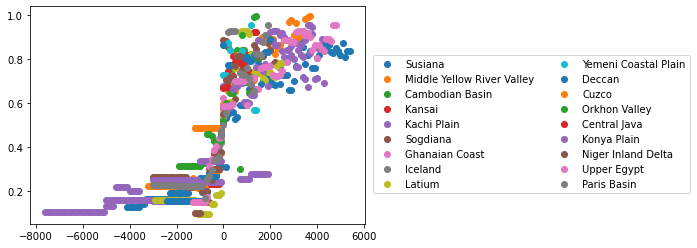

In [15]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.scatter(DF["RelTime"], DF["SPC1"], label=N)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.show()

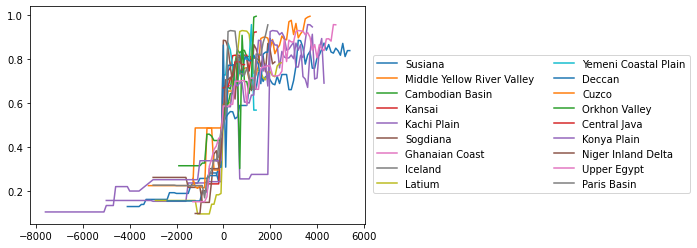

In [16]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.plot(DF["RelTime"], DF["SPC1"], label=N)
    #print(N)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.show()

## Fitting

Fit logistic model to the data set. Then, try cross-valdiation by fitting on some time series and predicting the others.

In [17]:
X, y = Data_RT["RelTime"].to_numpy(), Data_RT["SPC1"].to_numpy()
T = 5000
X = np.array(list(X)) # for some reason, this transformation is necessary
X = X/T # normalisation of the data

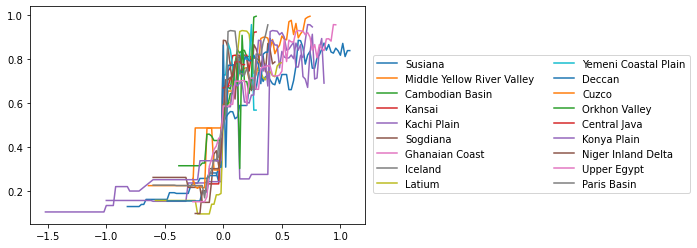

In [18]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.plot(DF["RelTime"]/T,    # ALSO normalised
             DF["SPC1"], label=N)
    #print(N)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.show()

In [19]:
def f(x, a, b, c, d):
    # the logistic function in its most general shape
    return a / (1. + np.exp(-c * (x - d))) + b

The parameter c (or rather 1/c) corresponds to a time scale of the temporal evolution.

In [20]:
(a_, b_, c_, d_), _ = opt.curve_fit(f, X, y)

p0 = np.array((a_, b_, c_, d_))
print(p0)

[ 5.91641013e-01  1.93784864e-01  1.93749268e+01 -1.54321399e-02]


In [21]:
print(a_, b_, c_, d_)
x_show = np.arange(min(X), max(X)+1000/T,100/T) # evaluate the estimated function here
print(min(x_show), max(x_show))
y_hat = f(x_show, a_, b_, c_, d_)

0.591641012617231 0.19378486354122598 19.374926787308905 -0.015432139940136057
-1.52 1.2600000000000025


In [22]:
print(p0)


[ 5.91641013e-01  1.93784864e-01  1.93749268e+01 -1.54321399e-02]


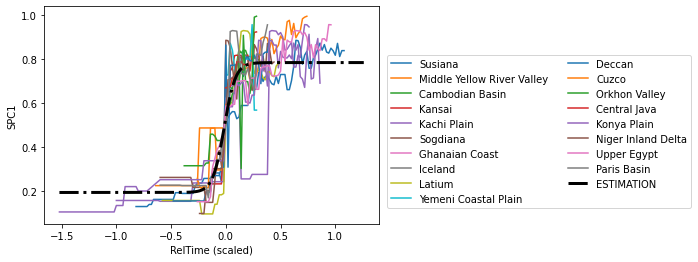

In [23]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.plot(DF["RelTime"]/T,    # ALSO normalised
             DF["SPC1"], label=N)
    #print(N)
    
plt.plot(x_show, y_hat, "-.",label="ESTIMATION", c = "k", linewidth=3)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.xlabel("RelTime (scaled)")
plt.ylabel("SPC1")
plt.show()

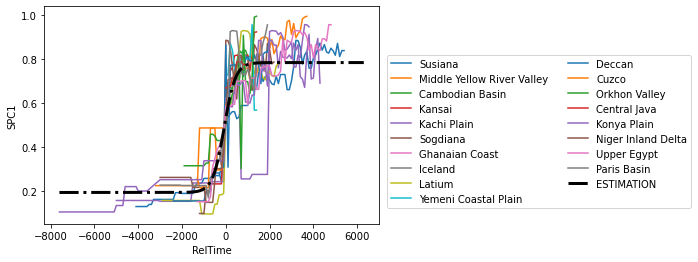

In [24]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.plot(DF["RelTime"],    # ALSO normalised
             DF["SPC1"], label=N)
    #print(N)
    
plt.plot(x_show*T, y_hat, "-.",label="ESTIMATION", c = "k", linewidth=3)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.ylabel("SPC1")
plt.xlabel("RelTime")
plt.show()

#### Residuals

In [25]:
y_est = f(X,a_, b_, c_, d_)
y_est_Residuals = y_est
y_Residuals = y

In [26]:
RMSE = (np.sum((y_est_Residuals-y_Residuals)**2) / len(y)  )**0.5
print(RMSE)

0.11299071583111889


In [27]:
def RhoSq(y_hat, y_true): # like in Turchin's original PCA paper
    y_mean = np.mean(y_true)
    return(1 - sum((y_hat-y_true)**2)/sum((y_mean-y_true)**2)  )

print("RhoSquared",RhoSq(y_hat = y_Residuals,
           y_true = y_est_Residuals))

RhoSquared 0.8186909046752217


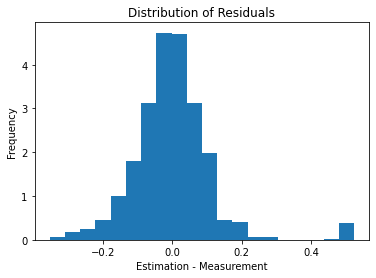

In [28]:
plt.hist(y_est_Residuals-y_Residuals,bins = 20, density = True)
plt.title("Distribution of Residuals")
plt.xlabel("Estimation - Measurement")
plt.ylabel("Frequency")
plt.show()

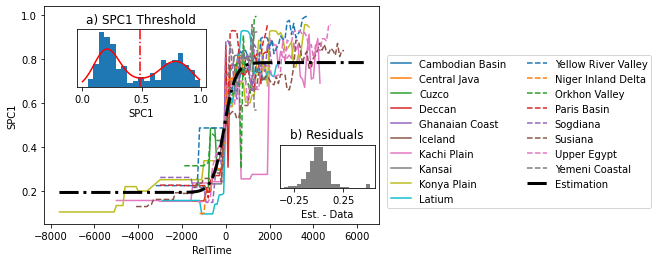

In [29]:
fig, ax1 = plt.subplots()
# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.2, 0.6, 0.3, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])

left, bottom, width, height = [0.67, 0.25, 0.22, 0.15]
ax3 = fig.add_axes([left, bottom, width, height])

style = "-"

for N in sorted(list(set(Data_RT["NGA"]))):
    DF = Data_RT[Data_RT["NGA"] == N]
    name = N
    # some abbreviations
    if N=="Middle Yellow River Valley":
        name = "Yellow River Valley"
    if N == "Yemeni Coastal Plain":
        name = "Yemeni Coastal"
        
    ax1.plot(DF["RelTime"],    
             DF["SPC1"],style, label=name)
    
    
    if N == "Latium":
        style = "--"
    #print(N)
    
ax1.plot(x_show*T, y_hat, "-.",label="Estimation", c = "k", linewidth=3)
lgd = ax1.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
ax1.set_ylabel("SPC1")
ax1.set_xlabel("RelTime")


ax2.hist(Data["SPC1"], bins = 20, density = True)
x = np.arange(0,1,0.01)
KDE = gaussian_kde(Data["SPC1"])(x)
KDE_min = np.min(KDE[20:80])  # find the minimum in the centre
xmin = x[KDE == KDE_min] # x-position of the minimum
ax2.plot(x, KDE, c="red")
ax2.axvline(xmin, linestyle="-.",c="red", )
ax2.set_title("a) SPC1 Threshold")
ax2.set_xlabel("SPC1")
ax2.axes.get_yaxis().set_visible(False)


ax3.set_title("b) Residuals")
ax3.hist(y_est_Residuals-y_Residuals,color="grey",bins = 20, density = True)
ax3.set_xlabel("Est. - Data")
ax3.set_xticks(np.arange(-0.25,0.26,0.5))
ax3.axes.get_yaxis().set_visible(False)

plt.savefig("Logistic_Residuals_RelTime.pdf",bbox_extra_artists=(lgd,),dpi=300,bbox_inches='tight')
plt.show()

## Out-of-Sample prediction

In [30]:
L = len(Data_RT["RelTime"].to_numpy())


In [31]:
def RhoSq(y_hat, y_true):
    y_mean = np.mean(y_true)
    return(1 - sum((y_hat-y_true)**2)/sum((y_mean-y_true)**2)  )

In [32]:
X1, y1 = Data_RT["RelTime"].to_numpy(), Data_RT["SPC1"].to_numpy()
T = 5000
X1 = np.array(list(X1)) # for some reason, this transformation is necessary
X1 = X1/T # normalisation of the data

for i in range(5):
    
    Selection = np.random.choice(np.arange(L), size = int(L/2), replace = False)
    
    X_train = X1[Selection]
    y_train = y1[Selection]
    
    test_indx = np.ones(len(X1), bool)
    test_indx[Selection]=0
    y_test = y1[test_indx]
    X_test = X1[test_indx]
    
    (a1_, b1_, c1_, d1_), _ = opt.curve_fit(f, X_train, y_train)
    print((a1_, b1_, c1_, d1_))
    print(RhoSq( f(X_test, a1_, b1_, c1_, d1_), y_test))
    

(0.5707839563364866, 0.20399225779641106, 27.256894354190056, -0.018239315804151387)
0.8621258348163517
(0.5858736109224868, 0.2039789785509969, 23.88120544668324, -0.012592809218719227)
0.8257751888245697
(0.5841995131650625, 0.1974588700580715, 20.29799545642896, -0.01673288550862178)
0.8781093076730374
(0.5999720239081197, 0.18395485992311542, 16.321747648468513, -0.02089202838895615)
0.8484526039417337
(-0.5908258514335802, 0.7860280253742399, -26.09573853545518, -0.0116483003356939)
0.8213144552192838


In [33]:
opt.curve_fit(f, X_train, y_train)[0]

array([-5.90825851e-01,  7.86028025e-01, -2.60957385e+01, -1.16483003e-02])

#### Bootstrapping

Will lead to some uncertainty values for our parameters. Hence, we might want to throw away some of them as a possible zero-value (prime candidate for this is the parameter d). The bootstrapped uncertainty for c will tell us more about the range of possible time scales for the temporal evolution and, by judging the width of this uncertainty, if there is a universal time scale.

In [34]:
Data_Reduced = Data_RT[["NGA", "RelTime", "SPC1"]]
NGA_red = list(set(Data_RT["NGA"]))


In [35]:
import random
random.seed(1234)
nBT = 1000 # how many Bootstraps
negCcount = 0

Params = pd.DataFrame(columns = ["a", "b", "c", "d"]) # df of the parameters

for i in range(nBT):
    NGA_selection = random.choices(NGA_red,k=len(NGA_red))
    Data_Bootstrap = pd.DataFrame(columns = Data_Reduced.columns)

    for n in NGA_selection:
        Data_Bootstrap = pd.concat([Data_Bootstrap, Data_Reduced[Data_Reduced["NGA"]==n]])
    
    
    X, y = Data_Bootstrap["RelTime"].to_numpy(), Data_Bootstrap["SPC1"].to_numpy()

    X = np.array(list(X)) # for some reason, this transformation is necessary
    X = X/T # normalisation of the data
    (a_, b_, c_, d_), _ = opt.curve_fit(f, X, y, p0) # p0: Initial guess = Full Estimation
                                                     # Otherwise: direction can reverse with c<0

    Params = pd.concat([Params,
                       pd.DataFrame(data={"a":[a_], "b":[b_], "c":[c_], "d":[d_]})])
    if c_ < 0:
        print(NGA_selection)
        negCcount +=1
        for N in NGA_selection:
            DF = Data_RT[Data_RT["NGA"] == N]
            plt.plot(DF["RelTime"]/T,    # ALSO normalised
            DF["SPC1"], label=N)
            plt.plot(x_show, y_hat, "-.",label="ESTIMATION", c = "k", linewidth=3) # FOR FULL DATA
            plt.plot(x_show, f(x_show, a_, b_, c_, d_), "-.",c="r", linewidth = 3)

        plt.show()
        
    print(a_, b_, c_, d_)
    print("-----------------")
print(Params.round(2))

0.6513243116267904 0.16435987126517856 9.524330983039523 -0.011768284480308781
-----------------
0.5833734483703583 0.18527635015083108 26.0620367559543 -0.009927182792877484
-----------------
0.5812046832229806 0.1807407817750493 26.33805646681256 -0.016393023677358575
-----------------
0.6386751296269996 0.1741137438340137 16.898585477396335 -0.0033315787520137663
-----------------
0.6488528046268879 0.1691227476679381 11.081705621775775 -0.0126178474478684
-----------------
0.6437244910935283 0.18163130571022754 9.450718504167416 -0.009480293211781683
-----------------
0.6209359600106793 0.19793307702766685 18.35777762469533 -0.01102455003864756
-----------------
0.5820114263559166 0.22597833502779238 19.863608651568946 -0.011767679586597682
-----------------
0.572600980179348 0.19149049321988046 20.37951357002076 -0.021896637755100565
-----------------
0.5880569351118257 0.20788059142022383 23.251855373835856 -0.008322762478311806
-----------------
0.6757728179991915 0.177862293903

0.6470309810166877 0.17195174574606006 12.026676871001685 -0.0068528554472334965
-----------------
0.6060457278290032 0.21023999169158777 14.912148384771625 -0.013087162992805544
-----------------
0.5683935362651309 0.22969428532243477 27.87733543851582 -0.017936814758227344
-----------------
0.5902979720808854 0.20432499225602796 25.62336721155369 -0.012778783136926326
-----------------
0.5836875404662434 0.2230805114446044 24.640352021158165 -0.0164331520478979
-----------------
0.5711647443464625 0.20607702153463037 32.5291274708204 -0.014894699606835692
-----------------
0.6383091637542209 0.18939485179977048 14.90078984627616 -0.011666314452313763
-----------------
0.6009174860780739 0.18204152096774015 18.302288947968854 -0.01751480733592204
-----------------
0.6357932970739225 0.1833963160367329 10.400115195413148 -0.011914424092033582
-----------------
0.5923559600820687 0.22659418833600667 18.104386835542257 -0.007463721829370333
-----------------
0.6692215520954992 0.15470792

0.5739459890259934 0.19340582872576625 20.71753383592718 -0.013490127524463214
-----------------
0.5390744255898466 0.20091227927003358 26.701800608314933 -0.020145930315967533
-----------------
0.5349118467515906 0.20852668974533872 42.10090656401822 -0.01883985917372482
-----------------
0.5759170605807158 0.20052073490318453 33.30072753259009 -0.01487309985144906
-----------------
0.5513209883313356 0.19061273382790386 37.84259102144481 -0.014681217003635314
-----------------
0.6695809534138679 0.15481949837738693 7.017510986373024 0.00735722661900109
-----------------
0.601265265964639 0.17986921928935265 19.963789747749924 -0.01491479227997614
-----------------
0.6100154496474471 0.18012780515788707 15.14105753262621 -0.012862725062068954
-----------------
0.5993112242493318 0.18952623093746826 18.34829546073427 -0.016149428160589643
-----------------
0.5173613494369126 0.21381982697521132 49.024453997042826 -0.016762205242238835
-----------------
0.6217049888806077 0.192198616112

0.6755212420444936 0.1535872751900867 7.4359632520273005 0.012039380533564497
-----------------
0.6718925939084367 0.1762576427514654 8.542283289520553 -0.005908683525376763
-----------------
0.6650716838454519 0.18540850664270334 12.742758911937035 -0.00450009886094794
-----------------
0.6345096801887891 0.19560203121931635 14.367483359207583 -0.00697595709372672
-----------------
0.7225362823344279 0.1576352436023566 6.657021558223674 8.352196786554594e-05
-----------------
0.5384493691302171 0.2050765062318953 50.87574532330572 -0.015072521208855168
-----------------
0.6145737699584038 0.18679736058012536 18.312897777914067 -0.019406093297497113
-----------------
0.6058470386906764 0.2067722616459547 17.654027748227268 -0.004326404271273069
-----------------
0.5935913435875372 0.1958961465564943 23.764203869019802 -0.013672996738746026
-----------------
0.6388995656649861 0.20537685882364348 12.98552372261711 -0.015454413268964084
-----------------
0.5767946189899215 0.174443658359

0.6056663205069416 0.2061757456462605 21.764439373261688 -0.011621743342627836
-----------------
0.5864562786480865 0.21883681054717466 20.314328348021892 -0.005248493113453055
-----------------
0.6226934126418648 0.18830448793527582 10.656489863497086 -0.009553273528021551
-----------------
0.6177328704988063 0.19590234568516515 19.99750530456261 -0.016660118345907544
-----------------
0.6137238817443382 0.19997818459668013 17.025268267092578 -0.011154427022216414
-----------------
0.5956930966452273 0.19763304323105307 30.495318063027845 -0.01291085542352661
-----------------
0.6148321505340104 0.17410931861796122 25.5242457825199 -0.009997885937995072
-----------------
0.6498317650151844 0.18971500325396784 14.708900859002238 -0.010253498962452059
-----------------
0.6411631953655789 0.17604431195892092 9.612661231219631 -0.016821053116038192
-----------------
0.5969173299928413 0.19191995297411718 19.938096170496216 -0.01694510885878106
-----------------
0.6260385412221968 0.184371

0.5819617642630602 0.1898958335742803 23.190892111325866 -0.013479228555931934
-----------------
0.6078348485632227 0.18606846027409274 17.346606280665643 -0.015012485526742786
-----------------
0.6284312179192112 0.18087688353015524 15.673945586349065 -0.009149810075948419
-----------------
0.5576372470187024 0.1885115718524472 34.277954171139775 -0.01922970390587821
-----------------
0.5997892566933872 0.18274048857388353 20.81160546840387 -0.018427400335359476
-----------------
0.5817010126311482 0.22792921787381618 23.43486020913543 -0.007713556837912988
-----------------
0.6352308267653708 0.16693087948629334 10.47232181315096 -0.018005259376700698
-----------------
0.5557915357839818 0.18707705927025145 38.73000306640842 -0.010858988177723341
-----------------
0.5141804263957036 0.20539541189241767 50.975392770670446 -0.02109074098344461
-----------------
0.5418375035965498 0.19399854206435274 45.92655533236289 -0.015722956689204568
-----------------
0.5885062524752974 0.19823130

0.5766045713247655 0.22409407027351264 27.129560418001038 -0.011942776487042088
-----------------
0.6450459284898313 0.16756995566937835 9.23296648455081 -0.01884449949733835
-----------------
0.5927183435957736 0.21156673322248937 18.56361130732083 -0.018777891457611676
-----------------
0.6064903615501528 0.17956913734262764 23.363134077257126 -0.005835650091951136
-----------------
0.5925441461103604 0.21435361513797171 16.8103478248804 -0.00980632918707919
-----------------
0.5915953059755678 0.18924645194792014 33.99991297936186 -0.011318137322000425
-----------------
0.5772094602348379 0.2122913788388752 27.413667928645406 -0.018876790560447408
-----------------
0.6183855730826016 0.20512286014162268 20.445500096785157 -0.008738296614254988
-----------------
0.5616301675595955 0.2013410776243767 34.56379419247048 -0.012645984043956756
-----------------
0.5354612806304679 0.2353295781461837 30.65460417641184 -0.012406531084084425
-----------------
0.5863803152415014 0.205833060508

0.600492085634407 0.2124747846161863 19.238862945659537 -0.013091637402486101
-----------------
0.5518013931258551 0.2181944126926268 43.584346886630804 -0.013823960323160644
-----------------
0.5796183112910582 0.18709539701398642 25.28212018403705 -0.007929091213594384
-----------------
0.5291447509768392 0.23032748653403637 29.0359455614158 -0.022504461025684225
-----------------
0.620160432184168 0.18312709205571093 15.459979627380916 -0.0089989797899684
-----------------
0.6586821228787235 0.15915840638077614 7.795923366057826 0.0007944768241023348
-----------------
0.5359801587516158 0.21100959470846384 44.76650729150891 -0.01753802503344766
-----------------
0.5819084723335223 0.1706415396913485 13.493406243557628 -0.02997236359293811
-----------------
0.6289622727055743 0.17914380982942335 15.908126070309912 -0.0035185685134279357
-----------------
0.6177117396787376 0.18448115594282533 10.540119595656764 -0.013334847068598627
-----------------
0.5857003232921445 0.176483641091

0.6403115986289594 0.18788558651630194 15.504740900388244 -0.01215057846252931
-----------------
0.5942641844966678 0.1917977595381558 22.032413839470887 -0.014811352166680166
-----------------
0.5669312556692816 0.19975947443951064 28.94137205233552 -0.013050109830593754
-----------------
0.5590758718781946 0.19982117435581045 31.67228271620866 -0.016374564596630285
-----------------
0.6199374004849234 0.1955341387452404 24.367816257314363 -0.00937482632643733
-----------------
0.6072594375840221 0.20016196961156268 16.602387459272983 -0.0182567897373887
-----------------
0.5627466896725263 0.19477290801284233 21.807378727565318 -0.01998973301555487
-----------------
0.7079891091927182 0.133050507583918 6.327852592793998 0.01804745703696491
-----------------
0.6229788702843227 0.1926672175033869 17.044463478161852 -0.009846987677544576
-----------------
0.6447296722138386 0.19017120382285335 13.016051502220666 -0.010723079316946951
-----------------
0.5973142130128878 0.18097174350033

0.6136376905042223 0.20600584174983208 16.43101871212549 -0.004780098063818599
-----------------
0.6736557215931588 0.1831159597235886 10.038215690472281 -0.007031789696460247
-----------------
0.5552896588937621 0.1894943925720976 30.05413018888859 -0.01959264326590351
-----------------
0.6326516241129231 0.1650634509848463 14.129898491945285 -0.01261919391174502
-----------------
0.611078813464055 0.18688508248244842 11.557368898227178 -0.01833467025739974
-----------------
0.5997966482765908 0.202124393662588 18.1928112181407 -0.0103271279159199
-----------------
0.5754695634658258 0.198464887314389 29.17919330612396 -0.016507500104016724
-----------------
0.6950693749372558 0.14572329495846514 6.9420045558805645 0.003529944366250115
-----------------
0.5253365380826364 0.21014441771214593 43.9317028505666 -0.0145551561602966
-----------------
0.6167726569675542 0.19463504032632273 22.011558874964752 -0.010218419108786347
-----------------
0.549878600452456 0.19826505261771665 29.93

0.6177762010087178 0.17804046406777665 19.341239329137657 -0.009890972765061953
-----------------
0.5827090985972557 0.191563883276163 21.475333627564197 -0.01252703443106545
-----------------
0.6114333878886334 0.18616660284667325 24.187132574818275 -0.014149519259396979
-----------------
0.5921253895758903 0.17445636258949945 20.186153464285187 -0.013231247281076197
-----------------
0.5685837490548207 0.18089877548137978 24.840674569646307 -0.014237879548912775
-----------------
0.5815606521691385 0.19876034120066863 24.566495134268024 -0.01894825681641306
-----------------
0.5817065183350152 0.19967470149066296 25.73976587481194 -0.011930293528756804
-----------------
0.6107757967848155 0.18944770415948128 24.29672888016501 -0.009680991301391582
-----------------
0.581547888220826 0.19400821626430567 17.59172312505145 -0.01736966807627056
-----------------
0.6403408415606449 0.15777335699745723 8.873972061378144 -0.01452193058858154
-----------------
0.6063848693396986 0.1981558913

0.5669496704150113 0.202911286867034 32.30071285286934 -0.015645751287119133
-----------------
0.6154949224206615 0.18619916272959014 22.491748536557363 -0.012145858931735016
-----------------
0.5914587927793648 0.17551935950394817 19.662711808858177 -0.012011051375163699
-----------------
0.6043088525776521 0.19758981826802793 17.33553964456082 -0.02124296059099559
-----------------
0.593003403891491 0.1891011623145278 29.140532808301575 -0.014182259987025584
-----------------
0.7035930481896954 0.16240484641845263 7.257150774279292 -0.022071829818619198
-----------------
0.5958693575627627 0.22530036987674257 21.133105909359543 -0.00904380885891306
-----------------
0.6531269567025478 0.16952611472419887 10.66886267635434 -0.007338767907268726
-----------------
0.6522126748032651 0.20113015042976432 11.685609343180868 -0.0099004083663414
-----------------
0.6483339106899549 0.174688841186926 13.783589377186285 -0.009838402893201223
-----------------
0.6270001764678275 0.1953936556015

Original estimates:
    
0.59  0.19  19.37  -0.01 

a / (1. + np.exp(-c * (x - d))) + b

In [36]:
print(negCcount)

0


In [37]:
Params.columns

Index(['a', 'b', 'c', 'd'], dtype='object')

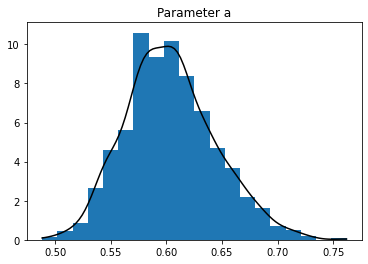

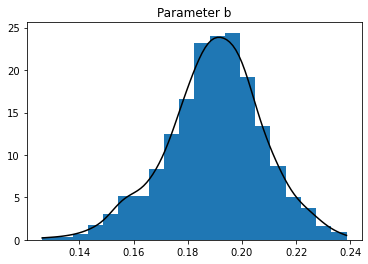

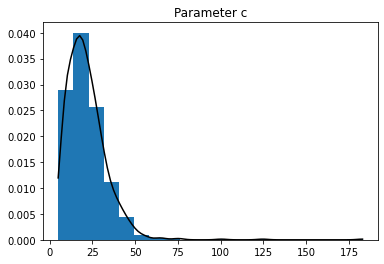

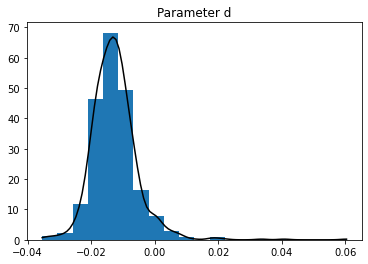

In [38]:
for P in Params.columns:
    
    
    Ps = Params[P]
    P_range = np.linspace(min(Ps), max(Ps),100)
    KDE = gaussian_kde(Ps)(P_range)
    
    plt.hist(Ps,bins=20, density= True)
    plt.plot(P_range, KDE, c="k")
    plt.title("Parameter "+str(P))
    plt.show()

Negative values for c are prevented by setting an initial parameter guess. Otherwise, one can have results with negative C<0 and also A<0 (A, B, C, D) instead of (a,b,c,d) with c>0. Then, via asymptotic behaviour at +/- infinity:

a + b = B
b = A + B

which implies

a = -A

### Analysis of the Curve

When does f(x) = y_est actually change? 
f(-infinity) = b and f(infinity) = a + b. We can now calculate the standard deviations of b and a+b via the bootstrap estimations and check when y_est exceeds b + sd(b) and reaches a+b - sd(a+b).

In [39]:
print(np.mean(Params["b"]), np.std(Params["b"]))
print(np.mean(Params["b"]+Params["a"]), np.std(Params["b"]+Params["a"]))

Thresh1 = np.mean(Params["b"]) + np.std(Params["b"])
Thresh2 = np.mean(Params["b"]+Params["a"]) - np.std(Params["b"]+Params["a"])
print(Thresh1, Thresh2)
print(min(y_est), max(y_est))

0.18978967342488917 0.01778053493718046
0.7934155812595082 0.031012706492004934
0.20757020836206963 0.7624028747675032
0.1937848635413554 0.7854258757998422


In [40]:
def f1(x):
    # first threshold
    return(f(x, p0[0], p0[1], p0[2], p0[3])-Thresh1)

T1 = opt.root(f1, -0.5)

In [41]:
def f2(x):
    # second threshold
    return(f(x, p0[0], p0[1], p0[2], p0[3])-Thresh2)

T2 = opt.root(f2, 0.5)

C:\Users\Tobias\AppData\Local\Temp/ipykernel_16136/465986300.py:3: RuntimeWarning: overflow encountered in exp
  return a / (1. + np.exp(-c * (x - d))) + b


In [42]:
Timeframe = (T2["x"] -T1["x"])[0]
t_2, t_1 = T2["x"], T1["x"]
# scale this back to original time
print("Most of the cultural evolution takes place in a time interval of ", np.round(T*Timeframe), "years.")

Most of the cultural evolution takes place in a time interval of  1792.0 years.


In [43]:
# 1748
# 1804

## Bootstrapping the Time Interval

Now we can repeat this task, but 

1) check if we actually need the parameter d

2) Calculate the time thresholds T1/T2 for every single Bootstrapped Data and therefore calculate a time interval with standard deviation

##### Testing d

In [44]:
print(np.quantile(Params["d"],0.975))


0.0030332575441605818


In [45]:
from statsmodels.stats.weightstats import ztest

ztest(Params["d"], x2=None, value=0, alternative="smaller")
# almost surely not 0, so we keep d

(-54.01266760489374, 0.0)

##### Bootstrap for the Time Interval

In [46]:
def fBT1(x):
    # first threshold for the Bootstrapping
    return(f(x, a_, b_, c_, d_)-Thresh1)

def fBT2(x):
    # second threshold for the Bootstrapping
    return(f(x, a_, b_, c_, d_)-Thresh2)


In [47]:
random.seed(1234)
nBT = 1000 # how many Bootstraps
Successes = 0

Params2 = pd.DataFrame(columns = ["a", "b", "c", "d"]) # df of the parameters

for i in range(nBT):
    
    # Select the random NGAs
    NGA_selection = random.choices(NGA_red,k=len(NGA_red))
    Data_Bootstrap = pd.DataFrame(columns = Data_Reduced.columns)

    for n in NGA_selection: # combine them to a data frame
        Data_Bootstrap = pd.concat([Data_Bootstrap, Data_Reduced[Data_Reduced["NGA"]==n]])
    
    
    X, y = Data_Bootstrap["RelTime"].to_numpy(), Data_Bootstrap["SPC1"].to_numpy()

    X = np.array(list(X)) # for some reason, this transformation is necessary
    X = X/T # normalisation of the data
    (a_, b_, c_, d_), _ = opt.curve_fit(f, X, y, p0) # p0: Initial guess = Full Estimation
                                                     # Otherwise: direction can reverse with c<0
    
    # Time Intervals
    T1 = opt.root(fBT1, t_1)
    T2 = opt.root(fBT2, t_2)
    
    # only add results, if opt.root is successful:
    if T1["success"] and T2["success"]:
        Successes += 1
        Params2 = pd.concat([Params2,
                       pd.DataFrame(data={"a":[a_], "b":[b_], "c":[c_], "d":[d_], "T1":T1["x"], "T2":T2["x"]})])    
        print(a_, b_, c_, d_, T1, T2)
        print("-----------------")


0.6513243116267904 0.16435987126517856 9.524330983039523 -0.011768284480308781     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-3.09169357e-13])
       r: array([-0.38424645])
  status: 1
 success: True
       x: array([-0.28940275])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([1.27564626e-12])
       r: array([-0.46595562])
  status: 1
 success: True
       x: array([0.24211591])
-----------------
0.5833734483703583 0.18527635015083108 26.0620367559543 -0.009927182792877484     fjac: array([[-1.]])
     fun: array([3.88578059e-15])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([3.89582061e-10])
       r: array([-0.5588137])
  status: 1
 success: True
       x: array([-0.13369155])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([7.49955653e-13])
       r: array([-0.16106425])

C:\Users\Tobias\AppData\Local\Temp/ipykernel_16136/465986300.py:3: RuntimeWarning: overflow encountered in exp
  return a / (1. + np.exp(-c * (x - d))) + b


 30.599953827504756 -0.018758678590653426     fjac: array([[-1.]])
     fun: array([9.15933995e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([7.85032317e-11])
       r: array([-0.1116213])
  status: 1
 success: True
       x: array([-0.18348898])     fjac: array([[-1.]])
     fun: array([2.66453526e-15])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-2.48060683e-10])
       r: array([-0.38022096])
  status: 1
 success: True
       x: array([0.1048696])
-----------------
0.5940128325797207 0.19261702715196036 19.99204225050298 -0.01843524506981147     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-1.27503286e-11])
       r: array([-0.29141885])
  status: 1
 success: True
       x: array([-0.20133209])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-5.55111512e-15])
       r: array([-0.46459276])
  status: 

0.6753719528693469 0.15517324056723916 7.228803797821165 0.008654936908214596     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-2.86565216e-12])
       r: array([-0.34938182])
  status: 1
 success: True
       x: array([-0.33381634])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([3.57454066e-11])
       r: array([-0.44288784])
  status: 1
 success: True
       x: array([0.31123731])
-----------------
0.5733467639011047 0.20491591878742635 25.828893993709993 -0.014947996662311324     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-7.79876164e-13])
       r: array([-0.06824004])
  status: 1
 success: True
       x: array([-0.22288077])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-2.72672995e-11])
       r: array([-0.398308

0.590292114936128 0.18343104110783218 23.048785719389702 -0.020233671885738252     fjac: array([[-1.]])
     fun: array([-4.99600361e-16])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-1.06893633e-10])
       r: array([-0.53362364])
  status: 1
 success: True
       x: array([-0.15711848])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([3.91908728e-14])
       r: array([-0.25591501])
  status: 1
 success: True
       x: array([0.15047632])
-----------------
0.5914346877746772 0.18836006390196428 15.956870387485655 -0.020004961994274807     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-3.81350507e-12])
       r: array([-0.29657759])
  status: 1
 success: True
       x: array([-0.23270914])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([1.13176135e-12])
       r: array([-0.26935

0.6118023564261584 0.18900273741205453 26.257898622841775 -0.011136351971344249     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([1.48214774e-14])
       r: array([-0.4727464])
  status: 1
 success: True
       x: array([-0.14306539])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-1.28896893e-13])
       r: array([-0.94506768])
  status: 1
 success: True
       x: array([0.09182195])
-----------------
0.5900692667470319 0.19988768936276619 17.013892971301793 -0.013909083462386746     fjac: array([[-1.]])
     fun: array([9.99200722e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.10642523e-10])
       r: array([-0.12900892])
  status: 1
 success: True
       x: array([-0.26830044])     fjac: array([[-1.]])
     fun: array([-4.77395901e-15])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([5.02492825e-10])


0.5713057976125042 0.20302142159030778 32.64782470084176 -0.013887557532793507     fjac: array([[-1.]])
     fun: array([-2.77555756e-17])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([1.10902398e-11])
       r: array([-0.14732611])
  status: 1
 success: True
       x: array([-0.16167903])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-6.73361367e-12])
       r: array([-0.38117786])
  status: 1
 success: True
       x: array([0.10398399])
-----------------
0.6346816830043751 0.16874179555078495 12.25393563584079 -0.008922010122506421     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-8.41549053e-14])
       r: array([-0.44669245])
  status: 1
 success: True
       x: array([-0.2317763])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([1.03472786e-13])
       r: arra

       x: array([-0.27945695])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([3.25184324e-13])
       r: array([-0.1303935])
  status: 1
 success: True
       x: array([0.31781994])
-----------------
0.6039003479393353 0.19362678775733214 17.965175381551692 -0.020033994269681433     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-1.5474011e-12])
       r: array([-0.24471243])
  status: 1
 success: True
       x: array([-0.22849518])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-1.49991131e-13])
       r: array([-0.59431231])
  status: 1
 success: True
       x: array([0.13496559])
-----------------
0.6217545376838117 0.1850270039992653 25.851703165283503 -0.008191020183731627     fjac: array([[-1.]])
     fun: array([-2.77555756e-17])
 message: 'The solution converged.'
    nfev: 14

       x: array([-0.21702213])     fjac: array([[-1.]])
     fun: array([-1.99840144e-15])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([3.44354545e-10])
       r: array([-0.59380662])
  status: 1
 success: True
       x: array([0.16361931])
-----------------
0.63428878872995 0.18233909290109532 11.83436671422028 -0.0077314206832260115     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.7681967e-12])
       r: array([-0.28671671])
  status: 1
 success: True
       x: array([-0.2767644])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([4.00249833e-11])
       r: array([-0.5868593])
  status: 1
 success: True
       x: array([0.19253243])
-----------------
0.5882178174922043 0.18527823244949973 27.188859832544246 -0.011046537591552554     fjac: array([[-1.]])
     fun: array([-1.72084569e-15])
 message: 'The solution converged.'
   

0.5759170605807158 0.20052073490318453 33.30072753259009 -0.01487309985144906     fjac: array([[-1.]])
     fun: array([-2.77555756e-17])
 message: 'The solution converged.'
    nfev: 16
     qtf: array([7.23318627e-12])
       r: array([-0.2318795])
  status: 1
 success: True
       x: array([-0.14672291])     fjac: array([[-1.]])
     fun: array([-1.55431223e-15])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([-1.85830573e-10])
       r: array([-0.45597942])
  status: 1
 success: True
       x: array([0.09592759])
-----------------
0.6695809534138679 0.15481949837738693 7.017510986373024 0.00735722661900109     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-5.21990784e-12])
       r: array([-0.34101552])
  status: 1
 success: True
       x: array([-0.34305428])     fjac: array([[-1.]])
     fun: array([-6.66133815e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([2.15220508e-10])
   

0.6565310360632662 0.1541599916120569 8.003640081628292 -0.00044212844956717604     fjac: array([[-1.]])
     fun: array([-2.77555756e-17])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.22873933e-13])
       r: array([-0.39270006])
  status: 1
 success: True
       x: array([-0.30331875])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([1.16573418e-14])
       r: array([-0.35805517])
  status: 1
 success: True
       x: array([0.31608735])
-----------------
0.6583557371113719 0.16978551295705346 7.866767269673609 -0.007979186618135662     fjac: array([[-1.]])
     fun: array([7.7438056e-15])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-7.3414011e-10])
       r: array([-0.28018681])
  status: 1
 success: True
       x: array([-0.36374616])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([1.98119

0.6395974189876199 0.18522447918285687 14.154240815102305 -0.010121402161681926     fjac: array([[-1.]])
     fun: array([4.99600361e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-1.07758663e-10])
       r: array([-0.30523815])
  status: 1
 success: True
       x: array([-0.24458411])     fjac: array([[-1.]])
     fun: array([-1.22124533e-15])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([-2.32218467e-10])
       r: array([-0.79726844])
  status: 1
 success: True
       x: array([0.14702453])
-----------------
0.5728741769737665 0.18993235432390193 34.24519935860556 -0.01461049448300131     fjac: array([[-1.]])
     fun: array([-4.16333634e-16])
 message: 'The solution converged.'
    nfev: 14
     qtf: array([7.19531934e-11])
       r: array([-0.58541862])
  status: 1
 success: True
       x: array([-0.11533546])     fjac: array([[-1.]])
     fun: array([-3.33066907e-16])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([1.46

0.6514789456015943 0.16261304266027832 10.230123056962315 -0.0058923582811474485     fjac: array([[-1.]])
     fun: array([3.33066907e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-1.10376708e-10])
       r: array([-0.42818077])
  status: 1
 success: True
       x: array([-0.26024223])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([9.66338121e-13])
       r: array([-0.48683155])
  status: 1
 success: True
       x: array([0.23372667])
-----------------
0.5855701982030203 0.18059197168525423 27.92070724481616 -0.01858174354452658     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 14
     qtf: array([1.51761936e-11])
       r: array([-0.71854868])
  status: 1
 success: True
       x: array([-0.12711727])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([2.24043006e-13])
       r: array([-0.1042883

0.5935913435875372 0.1958961465564943 23.764203869019802 -0.013672996738746026     fjac: array([[-1.]])
     fun: array([1.66533454e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([4.03928557e-11])
       r: array([-0.27196771])
  status: 1
 success: True
       x: array([-0.17816236])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([4.1855408e-14])
       r: array([-0.6142758])
  status: 1
 success: True
       x: array([0.11427251])
-----------------
0.6388995656649861 0.20537685882364348 12.98552372261711 -0.015454413268964084     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([-2.1121993e-14])
       r: array([-0.02838402])
  status: 1
 success: True
       x: array([-0.45216214])     fjac: array([[-1.]])
     fun: array([5.44009282e-15])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([8.77773298e-10])
     

0.5675974795639036 0.20748862395754003 46.30370853548318 -0.014962995105808102     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-8.68749517e-15])
       r: array([-0.00377712])
  status: 1
 success: True
       x: array([-0.20603594])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 15
     qtf: array([-8.01025912e-13])
       r: array([-0.5741573])
  status: 1
 success: True
       x: array([0.06664025])
-----------------
0.5689154446697238 0.20371630683106057 44.44906958331018 -0.014800727776680471     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 18
     qtf: array([1.89293026e-14])
       r: array([-0.17014192])
  status: 1
 success: True
       x: array([-0.12701564])     fjac: array([[-1.]])
     fun: array([2.22044605e-16])
 message: 'The solution converged.'
    nfev: 17
     qtf: array([-3.73816533e-11])
       r: ar

0.5900324001320346 0.1786170776377532 37.04877675850002 -0.009473973537240932     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([1.6348034e-13])
       r: array([-1.02004125])
  status: 1
 success: True
       x: array([-0.08948158])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-1.07691633e-14])
       r: array([-0.22897891])
  status: 1
 success: True
       x: array([0.11299961])
-----------------
0.6361155130341415 0.1968949297203883 16.129692008586016 -0.0056666160982380845     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-2.06387685e-12])
       r: array([-0.16929939])
  status: 1
 success: True
       x: array([-0.25802885])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-4.05776523e-11])
       r: arr

0.6091992269524384 0.18935503508598356 16.58585993968097 -0.024323242429142036     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-1.20418953e-11])
       r: array([-0.29308146])
  status: 1
 success: True
       x: array([-0.23411243])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([1.03875797e-11])
       r: array([-0.56401961])
  status: 1
 success: True
       x: array([0.14227975])
-----------------
0.6363724225500212 0.16976235025601238 10.035093837156099 -0.010394253808283847     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-4.3204329e-13])
       r: array([-0.35686439])
  status: 1
 success: True
       x: array([-0.28563009])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([1.82255322e-11])
       r: array([-0.4086958]

0.6345715459689614 0.18159334102777266 16.989750601425534 -0.010848616546350632     fjac: array([[-1.]])
     fun: array([-2.77555756e-15])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-3.59185126e-10])
       r: array([-0.42327048])
  status: 1
 success: True
       x: array([-0.19648678])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-4.23638902e-12])
       r: array([-0.83601837])
  status: 1
 success: True
       x: array([0.12922735])
-----------------
0.6054913853243968 0.17919358602564972 17.30278371539689 -0.01549999072346851     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.71487824e-12])
       r: array([-0.46798403])
  status: 1
 success: True
       x: array([-0.18960351])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([5.19539967e-12])
       r: arra

0.6517670290808287 0.16019301342244932 8.412226846513656 0.006538433836371118     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.09495746e-13])
       r: array([-0.36957714])
  status: 1
 success: True
       x: array([-0.29612559])     fjac: array([[-1.]])
     fun: array([-4.6629367e-15])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([6.0689076e-10])
       r: array([-0.38519117])
  status: 1
 success: True
       x: array([0.30342523])
-----------------
0.6105104396371284 0.2001881227986229 18.181440734104076 -0.01406596067063016     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-7.69304065e-12])
       r: array([-0.13259428])
  status: 1
 success: True
       x: array([-0.25624005])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.56541446e-14])
       r: array([-

0.660068927294409 0.14988882055725908 8.01316008605589 -0.0011721701107042812     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.57929225e-14])
       r: array([-0.42181907])
  status: 1
 success: True
       x: array([-0.29393637])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([1.74305015e-14])
       r: array([-0.3536109])
  status: 1
 success: True
       x: array([0.31776413])
-----------------
0.6537206524456537 0.19463436269692316 11.368456595606924 -0.0061152094964182354     fjac: array([[-1.]])
     fun: array([2.77555756e-16])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-6.0389943e-11])
       r: array([-0.14415122])
  status: 1
 success: True
       x: array([-0.34940644])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([1.41286982e-12])
       r: array

0.6450818602420323 0.17101371069351995 13.25884907961321 -0.00611200930059313     fjac: array([[-1.]])
     fun: array([-2.77555756e-17])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-8.80809314e-12])
       r: array([-0.4572298])
  status: 1
 success: True
       x: array([-0.21821033])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([2.82995849e-13])
       r: array([-0.65264888])
  status: 1
 success: True
       x: array([0.17483864])
-----------------
0.5883103818250714 0.1942995550778647 22.154287605532197 -0.020985592958064944     fjac: array([[-1.]])
     fun: array([-2.77555756e-17])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.38832834e-11])
       r: array([-0.28737055])
  status: 1
 success: True
       x: array([-0.19110544])     fjac: array([[-1.]])
     fun: array([1.44328993e-15])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-1.8343715

       x: array([-0.36687025])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.54333213e-11])
       r: array([-0.61300457])
  status: 1
 success: True
       x: array([0.20740019])
-----------------
0.6092507357120606 0.17629604694141485 17.22441292443079 -0.015897381082311906     fjac: array([[-1.]])
     fun: array([-5.55111512e-17])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([2.85654556e-11])
       r: array([-0.51102839])
  status: 1
 success: True
       x: array([-0.185235])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([2.26307861e-12])
       r: array([-0.38349705])
  status: 1
 success: True
       x: array([0.17172994])
-----------------
0.5897449572172133 0.19972694766417926 20.558966917972967 -0.013074625941258713     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
    

       x: array([-0.20782113])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-9.1276986e-12])
       r: array([-0.72738779])
  status: 1
 success: True
       x: array([0.13014151])
-----------------
0.6123126811879679 0.2019702992879233 11.872647927058901 -0.013841262157041987     fjac: array([[-1.]])
     fun: array([2.88657986e-15])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-1.86251931e-10])
       r: array([-0.06587872])
  status: 1
 success: True
       x: array([-0.40847144])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([7.12019332e-12])
       r: array([-0.56376588])
  status: 1
 success: True
       x: array([0.18660042])
-----------------
0.6126832076145378 0.1889937060686905 13.244359861815079 -0.012968482656435834     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 9
  

       x: array([-0.351562])     fjac: array([[-1.]])
     fun: array([-2.22044605e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([1.53325019e-10])
       r: array([-0.39718205])
  status: 1
 success: True
       x: array([0.44895422])
-----------------
0.6415738895797182 0.18641319567161793 15.822450665114767 -0.009837992933173159     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-1.03805853e-14])
       r: array([-0.32371664])
  status: 1
 success: True
       x: array([-0.22335866])     fjac: array([[-1.]])
     fun: array([-2.22044605e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-3.55737662e-12])
       r: array([-0.93162513])
  status: 1
 success: True
       x: array([0.12748301])
-----------------
0.6111673183743526 0.20055518759163687 14.405426935483401 -0.016167162222207543     fjac: array([[-1.]])
     fun: array([3.55271368e-15])
 message: 'The solution converged.'


0.6064903615501528 0.17956913734262764 23.363134077257126 -0.005835650091951136     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-8.64397443e-12])
       r: array([-0.62398866])
  status: 1
 success: True
       x: array([-0.13544914])     fjac: array([[-1.]])
     fun: array([5.55111512e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-1.19331767e-10])
       r: array([-0.53113732])
  status: 1
 success: True
       x: array([0.13131456])
-----------------
0.5915953059755678 0.18924645194792014 33.99991297936186 -0.011318137322000425     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 15
     qtf: array([1.69919634e-13])
       r: array([-0.60370941])
  status: 1
 success: True
       x: array([-0.11258784])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 16
     qtf: array([-8.08908496e-13])
       r: 

0.6152719685609689 0.16612281223355282 14.931115816201444 -0.018126337496257403     fjac: array([[-1.]])
     fun: array([-4.46864767e-15])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-5.83993354e-10])
       r: array([-0.57716263])
  status: 1
 success: True
       x: array([-0.19412783])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([2.43489673e-11])
       r: array([-0.27481779])
  status: 1
 success: True
       x: array([0.21271358])
-----------------
0.5984722957976495 0.17466435649330614 20.457567465886026 -0.012381474262882344     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([5.58594837e-12])
       r: array([-0.63616015])
  status: 1
 success: True
       x: array([-0.1514096])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([9.89208715e-14])
       r: arr

0.606593912007259 0.16759641264185487 21.3552993433476 -0.011731728424282646     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([1.96537231e-13])
       r: array([-0.79739767])
  status: 1
 success: True
       x: array([-0.13589131])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([2.78612688e-11])
       r: array([-0.24683374])
  status: 1
 success: True
       x: array([0.17188549])
-----------------
0.6315656089093846 0.16828992808071958 11.159062461075436 -0.004447827852647804     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-1.2909479e-11])
       r: array([-0.41106943])
  status: 1
 success: True
       x: array([-0.24759244])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([5.40744116e-11])
       r: array([-0.39315324]

0.5790835138122685 0.19274326226006838 32.44097453081829 -0.009202587135631709     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 17
     qtf: array([1.76247905e-14])
       r: array([-0.46868498])
  status: 1
 success: True
       x: array([-0.12137748])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-5.20139487e-13])
       r: array([-0.30074521])
  status: 1
 success: True
       x: array([0.11723597])
-----------------
0.6123368634584632 0.16959634122293468 17.391332293753546 -0.010990161921546128     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([2.36410058e-11])
       r: array([-0.61945988])
  status: 1
 success: True
       x: array([-0.16718081])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([1.33226763e-14])
 

0.5996119516644577 0.20052045248738312 16.109566838521545 -0.006430985363746383     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-4.51028104e-14])
       r: array([-0.11223327])
  status: 1
 success: True
       x: array([-0.28151367])     fjac: array([[-1.]])
     fun: array([-2.22044605e-16])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([8.79210038e-11])
       r: array([-0.56956265])
  status: 1
 success: True
       x: array([0.16122402])
-----------------
0.6153083383334108 0.17904496852979984 12.91260081412069 -0.01991034301910089     fjac: array([[-1.]])
     fun: array([5.16253706e-15])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-4.88891178e-10])
       r: array([-0.351263])
  status: 1
 success: True
       x: array([-0.25408981])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([1.13353771e-13])
    

0.6335899300031984 0.16989132777848256 13.639636778423883 -0.0005176131487069309     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-9.52016244e-14])
       r: array([-0.48336362])
  status: 1
 success: True
       x: array([-0.20294175])     fjac: array([[-1.]])
     fun: array([-5.55111512e-15])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([5.96488858e-10])
       r: array([-0.52397284])
  status: 1
 success: True
       x: array([0.1951539])
-----------------
0.6071278217699309 0.19486130365995816 17.94072732769882 -0.011718678652366176     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-3.0858649e-13])
       r: array([-0.2232342])
  status: 1
 success: True
       x: array([-0.22605121])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-2.60902411e-14])
       r: array([-0.6638989

0.6456724703238097 0.19009965928805253 10.1323878954343 -0.010784195160636903     fjac: array([[-1.]])
     fun: array([5.55111512e-17])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-2.82492085e-11])
       r: array([-0.17222904])
  status: 1
 success: True
       x: array([-0.36433808])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([2.88180591e-12])
       r: array([-0.65893099])
  status: 1
 success: True
       x: array([0.19194827])
-----------------
0.592446147440505 0.2010297634232914 18.11943676602894 -0.013764872696859531     fjac: array([[-1.]])
     fun: array([2.49800181e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-4.47472615e-11])
       r: array([-0.11720154])
  status: 1
 success: True
       x: array([-0.2618495])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([1.14130927e-13])
      

0.5896224638058132 0.177383472261432 12.161079727799043 -0.029023733104074564     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-2.33341124e-13])
       r: array([-0.34830885])
  status: 1
 success: True
       x: array([-0.26909502])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([4.23439062e-13])
       r: array([-0.05554121])
  status: 1
 success: True
       x: array([0.3693721])
-----------------
0.6130986011908512 0.18715729844895915 18.260124941920502 -0.014556710684435892     fjac: array([[-1.]])
     fun: array([-2.49800181e-16])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-7.72442943e-11])
       r: array([-0.36033071])
  status: 1
 success: True
       x: array([-0.19902953])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-2.86659585e-13])
       r: arra

0.5626122337825978 0.20385311397424044 40.542845916626796 -0.015903224823659152     fjac: array([[-1.]])
     fun: array([5.55111512e-17])
 message: 'The solution converged.'
    nfev: 15
     qtf: array([2.43957077e-11])
       r: array([-0.14970557])
  status: 1
 success: True
       x: array([-0.13955068])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 16
     qtf: array([-2.7822189e-13])
       r: array([-0.16351487])
  status: 1
 success: True
       x: array([0.10553748])
-----------------
0.643223952393189 0.1853145483402261 12.733505441434634 -0.013776837008440223     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-4.85347873e-12])
       r: array([-0.27358732])
  status: 1
 success: True
       x: array([-0.27518825])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([1.3355983e-13])
       r: array

0.5835496267634098 0.187602123543795 34.56173472635271 -0.012472464361350619     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([-1.58073554e-12])
       r: array([-0.66651625])
  status: 1
 success: True
       x: array([-0.10911625])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-1.42852397e-12])
       r: array([-0.29784276])
  status: 1
 success: True
       x: array([0.10861805])
-----------------
0.6041578472704128 0.17962336597886844 16.78579206731295 -0.018653131116609992     fjac: array([[-1.]])
     fun: array([-8.32667268e-17])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-4.69300432e-11])
       r: array([-0.4474091])
  status: 1
 success: True
       x: array([-0.19893475])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([3.83136856e-11])
       r: array([-0.3461551

0.6548495183723835 0.1664190120186432 7.623427808318876 -0.011583948851717532     fjac: array([[-1.]])
     fun: array([3.21964677e-15])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-4.43451748e-10])
       r: array([-0.29400137])
  status: 1
 success: True
       x: array([-0.36605054])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([2.29314345e-11])
       r: array([-0.40841874])
  status: 1
 success: True
       x: array([0.29207942])
-----------------
0.5721603761373305 0.19754600339792697 19.83627022205295 -0.017074220486071538     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-5.93969318e-15])
       r: array([-0.19535913])
  status: 1
 success: True
       x: array([-0.22007314])     fjac: array([[-1.]])
     fun: array([-1.33226763e-15])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([1.268186

0.6470472663346017 0.17442186700288154 12.310712083451094 -0.009139667750001836     fjac: array([[-1.]])
     fun: array([5.55111512e-17])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-3.21514482e-11])
       r: array([-0.38717439])
  status: 1
 success: True
       x: array([-0.24623705])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([3.39284156e-13])
       r: array([-0.66076946])
  status: 1
 success: True
       x: array([0.17752986])
-----------------
0.6187101898713556 0.1760567010392284 31.869877327939307 -0.003905522996199129     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-4.33209024e-13])
       r: array([-0.95317666])
  status: 1
 success: True
       x: array([-0.09568321])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 14
     qtf: array([-1.05471187e-14])
       r: ar

       x: array([-0.34153763])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([4.88872276e-11])
       r: array([-0.69590305])
  status: 1
 success: True
       x: array([0.22880772])
-----------------
0.6281734761398573 0.17467799296459527 11.144060986430409 -0.013629111334985056     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.74832371e-13])
       r: array([-0.34735955])
  status: 1
 success: True
       x: array([-0.27348034])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([1.68787206e-12])
       r: array([-0.4217368])
  status: 1
 success: True
       x: array([0.22651917])
-----------------
0.5810270198710534 0.18783937621162394 23.67895532865582 -0.016221584169408103     fjac: array([[-1.]])
     fun: array([-3.66373598e-15])
 message: 'The solution converged.'
    nfev: 11
 

0.5714533820380023 0.1948217238208412 35.72830979657553 -0.01806893759601909     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 17
     qtf: array([4.19664303e-13])
       r: array([-0.44532061])
  status: 1
 success: True
       x: array([-0.12387324])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-5.11812814e-14])
       r: array([-0.13741078])
  status: 1
 success: True
       x: array([0.12152773])
-----------------
0.649876359927748 0.18651449474000303 10.415108668509827 -0.022992652144895098     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-3.72779585e-12])
       r: array([-0.21219253])
  status: 1
 success: True
       x: array([-0.34912215])     fjac: array([[-1.]])
     fun: array([-4.99600361e-15])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([8.02744982e-10])
       r: array([-0.682865

0.5994364711867559 0.19565512554905004 20.43835885966535 -0.011889859570490739     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-2.466638e-12])
       r: array([-0.23868403])
  status: 1
 success: True
       x: array([-0.20261494])     fjac: array([[-1.]])
     fun: array([1.11022302e-15])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-2.00710115e-10])
       r: array([-0.63167403])
  status: 1
 success: True
       x: array([0.12769494])
-----------------
0.6601890471578262 0.18642456445261638 12.62180936630548 -0.007020135530570771     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-7.30565608e-12])
       r: array([-0.25834791])
  status: 1
 success: True
       x: array([-0.27707163])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([1.37667655e-14])
       r: array(

0.622192866959346 0.20520616400062097 16.117360197580613 -0.006956485623019231     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-2.3869795e-15])
       r: array([-0.03795739])
  status: 1
 success: True
       x: array([-0.35248884])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-8.39139869e-12])
       r: array([-0.93813495])
  status: 1
 success: True
       x: array([0.12635258])
-----------------
0.6177762010087178 0.17804046406777665 19.341239329137657 -0.009890972765061953     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-3.0281333e-14])
       r: array([-0.54384121])
  status: 1
 success: True
       x: array([-0.1645733])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-1.94289029e-14])
       r: array([-0.611309

0.60073684191212 0.18247893754916802 19.375924440930643 -0.016779269617413616     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([2.7483571e-13])
       r: array([-0.46586056])
  status: 1
 success: True
       x: array([-0.17847334])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([5.19584376e-13])
       r: array([-0.38929781])
  status: 1
 success: True
       x: array([0.15494538])
-----------------
0.5913789262965172 0.18245548576707982 15.266075121172662 -0.0180660890699295     fjac: array([[-1.]])
     fun: array([2.13717932e-15])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-3.03028491e-10])
       r: array([-0.36712345])
  status: 1
 success: True
       x: array([-0.22215303])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([1.23101529e-12])
       r: array([-0.17114136])


       x: array([-0.30052211])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([3.05487857e-11])
       r: array([-0.25148504])
  status: 1
 success: True
       x: array([0.38493798])
-----------------
0.6582851059776875 0.17881945491504814 12.485137434598602 -0.017560763494959976     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.4271917e-13])
       r: array([-0.3432796])
  status: 1
 success: True
       x: array([-0.26476])     fjac: array([[-1.]])
     fun: array([-3.33066907e-16])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([-1.10885634e-10])
       r: array([-0.82682065])
  status: 1
 success: True
       x: array([0.14708979])
-----------------
0.5897929285219016 0.20243851940502508 19.458284730720074 -0.018038630657575962     fjac: array([[-1.]])
     fun: array([1.33226763e-15])
 message: 'The solution converged.'
  

0.6061604116737889 0.18472488928706976 28.431665321542088 -0.014016169237630407     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 16
     qtf: array([2.18713936e-14])
       r: array([-0.62505059])
  status: 1
 success: True
       x: array([-0.12797296])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-2.26485497e-14])
       r: array([-0.77175156])
  status: 1
 success: True
       x: array([0.09184219])
-----------------
0.7097678669980447 0.15389632195291075 6.710296139935366 -0.00746724613771535     fjac: array([[-1.]])
     fun: array([4.4408921e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.41639367e-10])
       r: array([-0.33293217])
  status: 1
 success: True
       x: array([-0.38053237])     fjac: array([[-1.]])
     fun: array([-2.55351296e-15])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([5.39391087e-10])
       r: arra

0.6698196238333006 0.17408478660262272 8.7485049023709 -0.008826825382436607     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-9.1038288e-15])
       r: array([-0.27830244])
  status: 1
 success: True
       x: array([-0.34541162])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([9.27714572e-11])
       r: array([-0.62626015])
  status: 1
 success: True
       x: array([0.21711417])
-----------------
0.5669496704150113 0.202911286867034 32.30071285286934 -0.015645751287119133     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([2.26466068e-12])
       r: array([-0.14924969])
  status: 1
 success: True
       x: array([-0.16403985])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-1.24011912e-13])
       r: array([-0.23773235]

0.6006811923857316 0.16901302388476722 17.918230555354086 -0.015284967016666465     fjac: array([[-1.]])
     fun: array([6.10622664e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([1.56532287e-10])
       r: array([-0.64652721])
  status: 1
 success: True
       x: array([-0.16482987])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([5.69466696e-12])
       r: array([-0.12906227])
  status: 1
 success: True
       x: array([0.23022834])
-----------------
0.5822612190061148 0.19116105905006467 27.22801597428687 -0.01726930608806986     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([3.94875799e-12])
       r: array([-0.43419758])
  status: 1
 success: True
       x: array([-0.14730058])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-9.99533789e-13])
  

In [48]:
print(Successes)
print(Params2.round(2))

714
       a     b      c     d    T1    T2
0   0.65  0.16   9.52 -0.01 -0.29  0.24
0   0.58  0.19  26.06 -0.01 -0.13  0.16
0   0.64  0.17  16.90 -0.00 -0.17  0.14
0   0.65  0.17  11.08 -0.01 -0.26  0.20
0   0.64  0.18   9.45 -0.01 -0.34  0.23
..   ...   ...    ...   ...   ...   ...
0   0.71  0.14   5.77  0.02 -0.38  0.35
0   0.58  0.21  30.31 -0.01 -0.20  0.10
0   0.69  0.17   8.31 -0.01 -0.34  0.22
0   0.65  0.18   9.48 -0.01 -0.33  0.22
0   0.58  0.20  26.83 -0.02 -0.18  0.11

[714 rows x 6 columns]


In [49]:
np.mean(Params2["T2"]-Params2["T1"]), np.std(Params2["T2"]-Params2["T1"])

(0.41487430514727813, 0.12829822718856326)

In [50]:
TimeframeBT = Params2["T2"]-Params2["T1"]
np.mean(TimeframeBT)

0.41487430514727813

In [51]:
# times T for the transformation to years
print("Most of the cultural evolution takes place in a time interval of ", np.round(T*np.mean(TimeframeBT)),
      u"\u00B1",np.round(T*np.std(TimeframeBT)), "years.")

Most of the cultural evolution takes place in a time interval of  2074.0 ± 641.0 years.


In [52]:
# 1979 plus/minus 612
# 2116.0 ± 642.0

In [53]:
T2_scaled, T1_scaled = np.mean(Params2["T2"])*T, T*np.mean(Params2["T1"])

T1_start_scaled = T*np.mean(Params2["T1"]) - T*np.std(Params2["T1"])
T2_end_scaled = T*np.mean(Params2["T2"]) + T*np.std(Params2["T2"])

Susiana
Middle Yellow River Valley
Cambodian Basin
Kansai
Kachi Plain
Sogdiana
Ghanaian Coast
Iceland
Latium
Yemeni Coastal Plain
Deccan
Cuzco
Orkhon Valley
Central Java
Konya Plain
Niger Inland Delta
Upper Egypt
Paris Basin


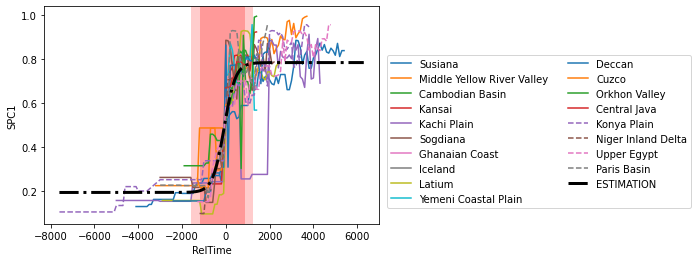

In [54]:
DF_Out = pd.DataFrame(columns=["NGA","RelTime","SPC1"])
DF_CC_Out = pd.DataFrame(columns =["NGA","RelTime","SPC1", "PolPop", "PolTerr",   "CapPop", "levels",
                         "government",  "infrastr", "writing", "texts", "money"])
style = "-"
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.plot(DF["RelTime"],   
             DF["SPC1"],style ,label=N)
    DF_Out = pd.concat((DF_Out, DF[["NGA", "RelTime", "SPC1"]]))
    DF_CC_Out = pd.concat((DF_CC_Out, DF[DF_CC_Out.columns]))
    print(N)
    if N == "Central Java":
        style = "--"
    
plt.plot(x_show*T, y_hat, "-.",label="ESTIMATION", c = "k", linewidth=3)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.ylabel("SPC1")
plt.xlabel("RelTime")
plt.axvspan(T1_scaled, T2_scaled, facecolor='r', alpha=0.4)
plt.axvspan(T2_scaled, T2_end_scaled, facecolor='r', alpha=0.2)
plt.axvspan(T1_start_scaled, T1_scaled, facecolor='r', alpha=0.2)
plt.savefig("SPC1_Time_Interval.pdf",bbox_inches='tight')
plt.show()

In [55]:
list(set(Data_RT["NGA"]))

['Susiana',
 'Middle Yellow River Valley',
 'Cambodian Basin',
 'Kansai',
 'Kachi Plain',
 'Sogdiana',
 'Ghanaian Coast',
 'Iceland',
 'Latium',
 'Yemeni Coastal Plain',
 'Deccan',
 'Cuzco',
 'Orkhon Valley',
 'Central Java',
 'Konya Plain',
 'Niger Inland Delta',
 'Upper Egypt',
 'Paris Basin']

In [56]:
print(T1_start_scaled,T1_scaled, T2_scaled, T2_end_scaled)

-1576.6991352455464 -1195.3138769714888 879.0576487648991 1224.0009991407667


In [57]:
DF_Out.shape

(771, 3)

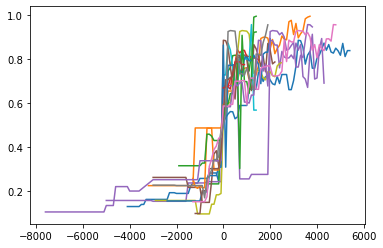

In [58]:
fig1 = plt.figure()
for i in list(set(DF_Out["NGA"])):
    DF_NGA_i = DF_Out[DF_Out["NGA"]==i]
    plt.plot(DF_NGA_i["RelTime"], DF_NGA_i["SPC1"])

In [59]:
DF_Out.index=np.arange(0, DF_Out.shape[0])
DF_Out.to_csv("RelTime_TimeSeries_SPC1.csv")
DF_CC_Out.index = DF_Out.index

In [60]:
Timeframes = np.array([T1_start_scaled,T1_scaled, T2_scaled, T2_end_scaled])

In [61]:
#np.savetxt("Parameters_and_Times.txt",np.concatenate((p0, Timeframes)))

In [62]:
#DF_CC_Out.to_csv("RelTime_TimeSeries_CC.csv")

In [63]:
DF_CC_Out

,NGA,RelTime,SPC1,PolPop,PolTerr,CapPop,levels,government,infrastr,writing,texts,money
0,Susiana,-4100,0.129737,1.597045,1.844231,2.591618,1.000000,0.090000,0.181818,0.000000,0.0000,0.9
1,Susiana,-4000,0.129737,1.597045,1.844231,2.591618,1.000000,0.090000,0.181818,0.000000,0.0000,0.9
2,Susiana,-3900,0.129737,1.597045,1.844231,2.591618,1.000000,0.090000,0.181818,0.000000,0.0000,0.9
3,Susiana,-3800,0.129737,1.597045,1.844231,2.591618,1.000000,0.090000,0.181818,0.000000,0.0000,0.9
4,Susiana,-3700,0.129737,1.597045,1.844231,2.591618,1.000000,0.090000,0.181818,0.000000,0.0000,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...
766,Paris Basin,1500,0.822424,7.230449,5.544068,5.301030,5.002574,0.809091,0.900000,0.816667,0.9750,5.0
767,Paris Basin,1600,0.818518,6.977724,5.531479,5.176091,5.125572,0.981818,0.900000,0.816667,0.9500,4.5
768,Paris Basin,1700,0.876882,7.255273,5.654951,5.413454,7.488753,0.881818,0.872727,0.833333,0.9625,5.0
769,Paris Basin,1800,0.910034,7.322219,6.414973,5.658011,7.466035,0.881818,0.966667,0.816667,0.9500,5.0


### Dan's Questions

Do large NGAs reach the SPC1 threshold again after a decline? And are the NGAs that never reach the threshold too young (i.e. did not have enough time to develop)?

In [64]:
Lengths_Small = []
for i in SmallNGAs:
    #print(i)
   # print(Data[Data["NGA"]==i][["NGA", "Time","SPC1"]])
    df_i = Data[Data["NGA"]==i][["NGA", "Time","SPC1"]]
    #print(len(df_i["Time"]))
    Lengths_Small.append(len(df_i["Time"]))
print(" ##################### ")
print("For the low-SPC1 NGAs, the mean length of their time series is",np.mean(Lengths_Small), u"\u00B1",
      np.round(np.std(Lengths_Small),1),"data points and the median is",
     np.median(Lengths_Small), "data points.")

 ##################### 
For the low-SPC1 NGAs, the mean length of their time series is 7.75 ± 9.4 data points and the median is 3.0 data points.


In [65]:
Lengths_Large = []
for i in LargeNGAs:
    #print(i)
   # print(Data[Data["NGA"]==i][["NGA", "Time","SPC1"]])
    df_i = Data[Data["NGA"]==i][["NGA", "Time","SPC1"]]
    #print(len(df_i["Time"]))
    Lengths_Large.append(len(df_i["Time"]))
print(" ##################### ")

print("For the high-SPC1 NGAs, the mean length of their time series is",np.round(np.mean(Lengths_Large),1), u"\u00B1",
      np.round(np.std(Lengths_Large),1),"data points and the median is",
     np.median(Lengths_Large), "data points.")

 ##################### 
For the high-SPC1 NGAs, the mean length of their time series is 42.8 ± 32.4 data points and the median is 38.5 data points.


Indeed, the low-SPC1 NGAs have very short "life times" and their development may simply have been prematurely ended by an outside influence (e.g. conquest).

#### Do they reach SPC1 threshold a second time?

In [66]:
DF_second_time = DF_CC_Out[["NGA", "RelTime", "SPC1"]]
DF_second_time = DF_second_time[DF_second_time["RelTime"]>-1] # look only at data after the first threshold


In [67]:
np.float64(SPC_Break)

0.49

In [68]:
DF_second_time.loc[DF_second_time["SPC1"] < np.float64(SPC_Break)]

,NGA,RelTime,SPC1
261,Kachi Plain,700,0.255631
262,Kachi Plain,800,0.255631
263,Kachi Plain,900,0.255631
264,Kachi Plain,1000,0.255631
265,Kachi Plain,1100,0.255631
266,Kachi Plain,1200,0.276092
267,Kachi Plain,1300,0.276092
268,Kachi Plain,1400,0.276092
269,Kachi Plain,1500,0.276092
270,Kachi Plain,1600,0.276092
